   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


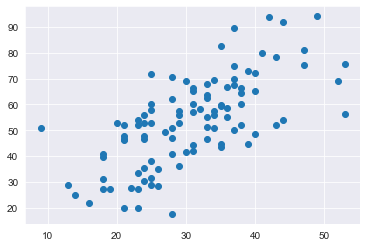

Intercept    13.214113
completed     1.306826
dtype: float64


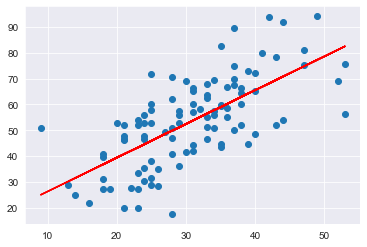

39.35062487732294


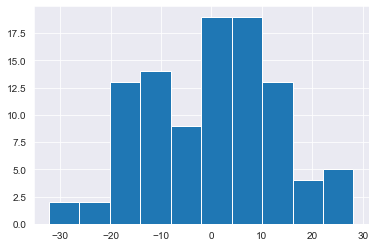

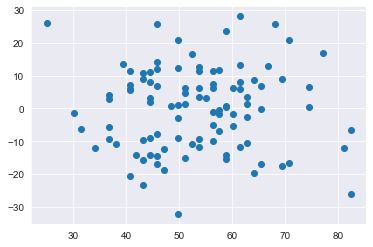

/Users/testo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


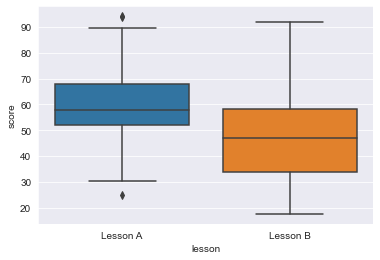

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


<Figure size 432x288 with 0 Axes>

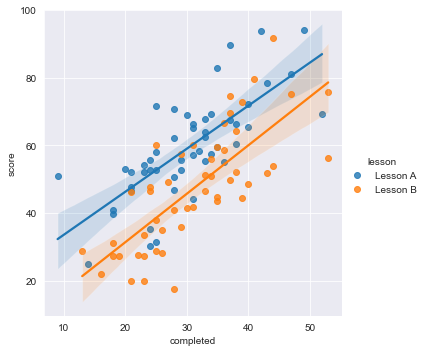

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

codecademy = pd.read_csv('codecademy.csv')

# Print the first five rows
print(codecademy.head())

# Create a scatter plot of score vs completed
plt.scatter(codecademy.completed, codecademy.score)
plt.show()
# Show then clear plot
plt.clf()
# Fit a linear regression to predict score based on prior lessons completed
model = sm.OLS.from_formula("score ~ completed", data=codecademy)
results = model.fit()
print(results.params)
# Intercept interpretation:
# Person who hasn't been taken any course will get 13.21 points.
# Slope interpretation:
# Each taken course raises the score by 1.3 points.
# Plot the scatter plot with the line on top
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, results.predict(codecademy), color = "red")
plt.show()
# Show then clear plot
plt.clf()
# Predict score for learner who has completed 20 prior lessons
prediction = results.params[1] * 20 + results.params[0]
print(prediction)
# Calculate fitted values
fitted_values = results.predict(codecademy)
# Calculate residuals
residuals = codecademy.score - fitted_values
# Check normality assumption
plt.hist(residuals)
plt.show()
# Show then clear the plot
plt.clf()
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.show()
# Show then clear the plot
plt.clf()
# Create a boxplot of score vs lesson
sns.boxplot(codecademy.lesson, codecademy.score)
plt.show()
# Show then clear plot
plt.clf()
# Fit a linear regression to predict score based on which lesson they took
model_2 = sm.OLS.from_formula("score ~ lesson", data=codecademy)
results_2 = model_2.fit()
print(results_2.params)
# Calculate and print the group means and mean difference (for comparison)
lesson_a_mean = 59.220
lesson_b_mean = -11.642 + 59.220
difference = lesson_a_mean - lesson_b_mean
# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()